# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import librosa
import soundfile as sf

import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio
import torchaudio.transforms as T

from sklearn.cluster import KMeans

# (Librosa) Load and Process Data

In [ ]:
# load the audio with librosa in lower sample rate
wv_librosa_sr, sr_librosa_sr = librosa.load("../../data/Balance Memory.wav")

wv_librosa_sr, wv_librosa_sr.shape, sr_librosa_sr 

(array([-0.02099079, -0.02828838, -0.02593338, ..., -0.23950645,
        -0.23623453, -0.24782246], dtype=float32),
 (330750,),
 22050)

In [3]:
# load the audio with librosa in 32khz, the default sample rate
wv_librosa, sr_librosa = librosa.load("../../data/Balance Memory.wav", sr=32000)

wv_librosa, wv_librosa.shape, sr_librosa

(array([-0.02627563, -0.02667236, -0.02664185, ..., -0.23928833,
        -0.23931885, -0.2401123 ], dtype=float32),
 (480000,),
 32000)

In [4]:
# calculate mel spectogram with the sample rate
mel_librosa = librosa.feature.melspectrogram(
    y=wv_librosa,
    sr=sr_librosa,
    n_fft=1024,
    hop_length=512,
    n_mels=64
)

mel_librosa, mel_librosa.shape

(array([[7.8394003e-03, 1.3747171e-04, 1.4267817e-04, ..., 3.9486961e+01,
         5.6667221e+01, 1.2345200e+02],
        [1.9790067e-03, 3.5491801e-04, 1.8899546e-04, ..., 4.3814306e+00,
         1.0700668e+01, 2.5751408e+01],
        [5.5085937e-03, 6.3771643e-03, 3.7669364e-02, ..., 5.5715400e-01,
         7.4186420e-01, 1.0564188e+00],
        ...,
        [6.3033635e-06, 3.1591676e-09, 2.4814675e-09, ..., 5.7055920e-09,
         5.2979279e-09, 1.2413082e-04],
        [6.3953303e-06, 2.9834717e-09, 2.8564906e-09, ..., 7.0294139e-09,
         7.5115434e-09, 1.2300805e-04],
        [5.0494136e-06, 1.9746578e-09, 1.7566129e-09, ..., 3.1980629e-09,
         4.6242379e-09, 1.1659229e-04]], dtype=float32),
 (64, 938))

In [5]:
# convert to decibels (normalize)
mel_librosa_log = librosa.amplitude_to_db(mel_librosa)  

mel_librosa_log, mel_librosa_log.shape

(array([[-32.48626   , -32.48626   , -32.48626   , ...,  31.929073  ,
          35.06664   ,  41.829964  ],
        [-32.48626   , -32.48626   , -32.48626   , ...,  12.832318  ,
          20.588219  ,  28.216019  ],
        [-32.48626   , -32.48626   , -28.480234  , ...,  -5.080495  ,
          -2.5935113 ,   0.47672242],
        ...,
        [-32.48626   , -32.48626   , -32.48626   , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [-32.48626   , -32.48626   , -32.48626   , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [-32.48626   , -32.48626   , -32.48626   , ..., -32.48626   ,
         -32.48626   , -32.48626   ]], dtype=float32),
 (64, 938))

In [6]:
mel_librosa_log_transpose = mel_librosa_log.T

mel_librosa_log_transpose, mel_librosa_log_transpose.shape

(array([[-32.48626   , -32.48626   , -32.48626   , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [-32.48626   , -32.48626   , -32.48626   , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [-32.48626   , -32.48626   , -28.480234  , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        ...,
        [ 31.929073  ,  12.832318  ,  -5.080495  , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [ 35.06664   ,  20.588219  ,  -2.5935113 , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [ 41.829964  ,  28.216019  ,   0.47672242, ..., -32.48626   ,
         -32.48626   , -32.48626   ]], dtype=float32),
 (938, 64))

In [15]:
# generate back the waveform to the music
inverse_mel_librosa = librosa.feature.inverse.mel_to_stft(
    mel_librosa_log_transpose,
    sr=sr_librosa,
    n_fft=1024
)

inverse_mel_librosa_griffinlim = librosa.griffinlim(inverse_mel_librosa)
sf.write("./original_audio.wav", inverse_mel_librosa_griffinlim, sr_librosa)

c:\Users\julio\anaconda3\Lib\site-packages\librosa\feature\inverse.py:99: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(


In [7]:
# create df
df_librosa = pd.DataFrame(mel_librosa_log_transpose) # transpose for time rows

df_librosa

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-15.892344,-13.493561,-14.590464,-6.068701,-13.325738,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
1,-32.486259,-32.486259,-32.486259,-30.018620,-32.486259,-9.199663,1.046602,1.864609,6.168241,-19.041531,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
2,-32.486259,-32.486259,-28.480234,-10.490613,-19.115448,-8.730347,-2.419414,2.684580,9.246306,-13.079181,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
3,-32.486259,-32.486259,-24.106857,-4.923679,-13.974628,-5.377695,8.241421,4.396136,6.544615,-17.883335,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
4,-32.486259,-32.486259,-23.733116,-4.895738,-14.620181,-6.290042,-0.109114,-2.892497,0.664512,-28.408689,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,31.271580,15.737822,-4.916617,-32.486259,-32.486259,-15.654840,-20.941238,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
934,19.713322,13.835960,-16.410021,-26.573008,-17.096123,-5.929788,-14.075822,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
935,31.929073,12.832318,-5.080495,-25.084759,-27.236526,-21.793566,-18.129677,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
936,35.066639,20.588219,-2.593511,-21.328472,-20.751068,-17.238737,-20.210371,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259


In [8]:
# add time , by defining the time windows in seconds
time = librosa.times_like(mel_librosa, sr=sr_librosa)

time, time.shape

(array([ 0.   ,  0.016,  0.032,  0.048,  0.064,  0.08 ,  0.096,  0.112,
         0.128,  0.144,  0.16 ,  0.176,  0.192,  0.208,  0.224,  0.24 ,
         0.256,  0.272,  0.288,  0.304,  0.32 ,  0.336,  0.352,  0.368,
         0.384,  0.4  ,  0.416,  0.432,  0.448,  0.464,  0.48 ,  0.496,
         0.512,  0.528,  0.544,  0.56 ,  0.576,  0.592,  0.608,  0.624,
         0.64 ,  0.656,  0.672,  0.688,  0.704,  0.72 ,  0.736,  0.752,
         0.768,  0.784,  0.8  ,  0.816,  0.832,  0.848,  0.864,  0.88 ,
         0.896,  0.912,  0.928,  0.944,  0.96 ,  0.976,  0.992,  1.008,
         1.024,  1.04 ,  1.056,  1.072,  1.088,  1.104,  1.12 ,  1.136,
         1.152,  1.168,  1.184,  1.2  ,  1.216,  1.232,  1.248,  1.264,
         1.28 ,  1.296,  1.312,  1.328,  1.344,  1.36 ,  1.376,  1.392,
         1.408,  1.424,  1.44 ,  1.456,  1.472,  1.488,  1.504,  1.52 ,
         1.536,  1.552,  1.568,  1.584,  1.6  ,  1.616,  1.632,  1.648,
         1.664,  1.68 ,  1.696,  1.712,  1.728,  1.744,  1.76 , 

In [9]:
df_librosa.index = time

df_librosa

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0.000,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-15.892344,-13.493561,-14.590464,-6.068701,-13.325738,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
0.016,-32.486259,-32.486259,-32.486259,-30.018620,-32.486259,-9.199663,1.046602,1.864609,6.168241,-19.041531,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
0.032,-32.486259,-32.486259,-28.480234,-10.490613,-19.115448,-8.730347,-2.419414,2.684580,9.246306,-13.079181,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
0.048,-32.486259,-32.486259,-24.106857,-4.923679,-13.974628,-5.377695,8.241421,4.396136,6.544615,-17.883335,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
0.064,-32.486259,-32.486259,-23.733116,-4.895738,-14.620181,-6.290042,-0.109114,-2.892497,0.664512,-28.408689,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.928,31.271580,15.737822,-4.916617,-32.486259,-32.486259,-15.654840,-20.941238,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
14.944,19.713322,13.835960,-16.410021,-26.573008,-17.096123,-5.929788,-14.075822,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
14.960,31.929073,12.832318,-5.080495,-25.084759,-27.236526,-21.793566,-18.129677,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
14.976,35.066639,20.588219,-2.593511,-21.328472,-20.751068,-17.238737,-20.210371,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259


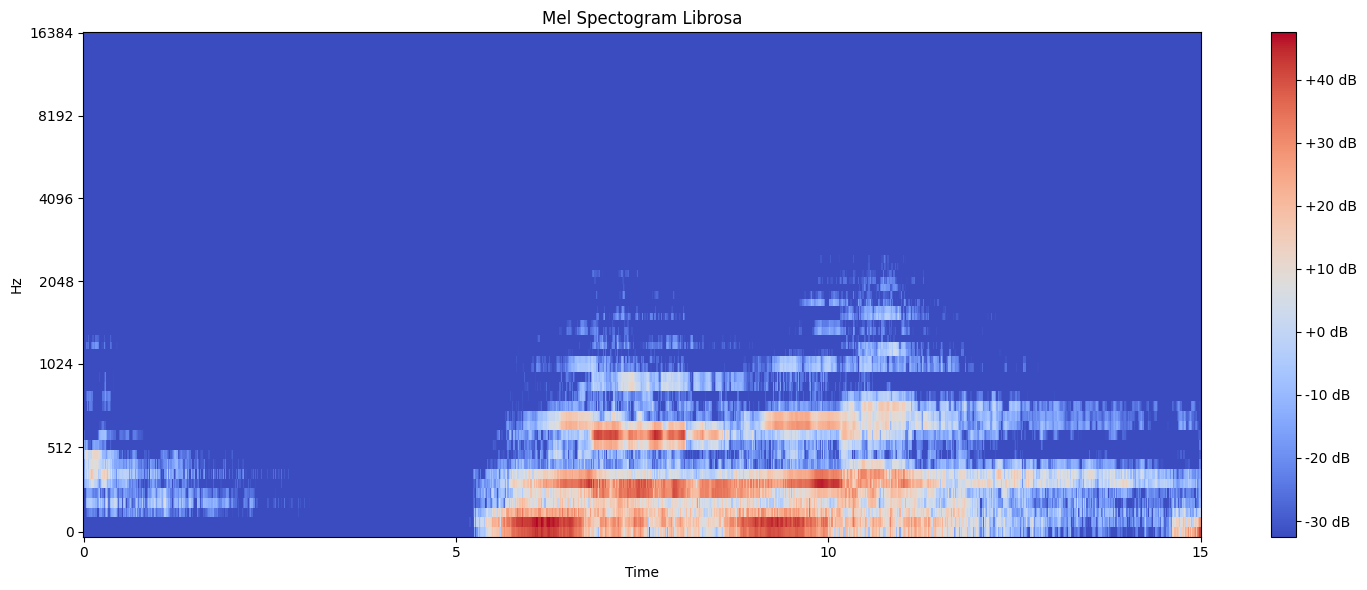

In [10]:
# visualize mel spectogram
plt.figure(figsize=(15, 6))
librosa.display.specshow(mel_librosa_log, sr=sr_librosa, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectogram Librosa")
plt.tight_layout()
plt.show()

# Quantize Preprocess Data

In [ ]:
# now we must to convert the data into a neural network compatible representative vectors, or in other words codebook vectors
# we are going to apply the rvq technique, to get a lower and efficient data so called quantize data coming from multiple layers of quantizer below

class ResidualVectorQuantizer(nn.Module):
    def __init__(self, num_codebooks, codebooks_size, features_dim):
        super(ResidualVectorQuantizer, self).__init__()
        self.num_codebooks = num_codebooks
        self.codebooks = nn.Parameter(torch.rand(num_codebooks, codebooks_size, features_dim))
    def initialize_codebooks(self ,x):
        for i in range(self.num_codebooks):
            kmeans = KMeans(n_clusters=self.codebooks.shape[1], random_state=0)
            subset_indices = torch.randperm(x.shape[0])[:min(10000, x.shape[0])]
            subset = x[subset_indices].cpu().numpy()
            kmeans.fit(subset)
            self.codebooks[i].data = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)
    def quantize(self, x):
        residual = x.clone()
        quantized_output = torch.zeros_like(x)
        quantized_indices = []
        for i in range(self.num_codebooks):
            distances = torch.cdist(residual, self.codebooks[i])
            indices = distances.argmin(dim=1)
            quantized_vectors = self.codebooks[i][indices]
            quantized_output += quantized_vectors
            residual -= quantized_vectors
            quantized_indices.append(indices)
            # print(f"distance shape: {distances.shape}")
            # print(f"indice shape: {indices.shape}")
            # print(f"vector shape: {quantized_vectors.shape}")
        return quantized_output, torch.stack(quantized_indices, dim=1)
    def dequantize(self, quantize_indices):
        reconstructed = torch.zeros((quantize_indices.shape[0], self.codebooks.shape[2])).to(device)
        for i in range(self.num_codebooks):
            reconstructed += self.codebooks[i][quantize_indices[:, i]]
        return reconstructed

# initialize the model, the optimizer and its hyperparameters
device = ("cuda" if torch.cuda.is_available() else "cpu")
num_codebooks = 4
codebook_size = 512
feature_dim = mel_librosa_log_transpose.shape[1]
epochs = 60000
learning_rate = 0.001
rvq = ResidualVectorQuantizer(num_codebooks, codebook_size, feature_dim).to(device)
optim = optim.Adam(rvq.parameters(), lr=learning_rate)

# initializa original data
print("input tensor in cpu device")
input_tensor = torch.tensor(mel_librosa_log_transpose).to(device)
input_tensor, input_tensor.shape

input tensor in cpu device


(tensor([[-32.4863, -32.4863, -32.4863,  ..., -32.4863, -32.4863, -32.4863],
         [-32.4863, -32.4863, -32.4863,  ..., -32.4863, -32.4863, -32.4863],
         [-32.4863, -32.4863, -28.4802,  ..., -32.4863, -32.4863, -32.4863],
         ...,
         [ 31.9291,  12.8323,  -5.0805,  ..., -32.4863, -32.4863, -32.4863],
         [ 35.0666,  20.5882,  -2.5935,  ..., -32.4863, -32.4863, -32.4863],
         [ 41.8300,  28.2160,   0.4767,  ..., -32.4863, -32.4863, -32.4863]],
        device='cuda:0'),
 torch.Size([938, 64]))

In [12]:
# lets initialize the rvq and its codebook from zero or lets load a saved model
# rvq.initialize_codebooks(input_tensor)
rvq.load_state_dict(torch.load("C:/Users/julio/Desktop/projects/ai-models/lyrics2music/2-models/small-rqv/weights/best_rvq_model.pth"))

C:\Users\julio\AppData\Local\Temp\ipykernel_15708\996004116.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rvq.load_state_dict(torch.load("C:/Users/julio/Desktop/projec

<All keys matched successfully>

In [14]:
# train codebook
best_loss = float("inf")
no_improvement = 0
for i in range(epochs):
    optim.zero_grad()
    quantized_output, _ = rvq.quantize(input_tensor)
    loss = torch.mean((input_tensor - quantized_output)**2)
    loss.backward()
    optim.step()
    torch.save(rvq.state_dict(), "./weights/checkpoint_rvq_model_2.pth")
    torch.save(optim.state_dict(), "./weights/checkpoint_rvq_optimizer_2.pth")
    if (i + 1) % 10 == 0:
        print(f"epoch {i}, loss: {loss.item()}") 
    if loss < best_loss:
        best_loss = loss
        no_improvement = 0
        torch.save(rvq.state_dict(), './weights/best_rvq_model_2.pth')
    else:
        no_improvement
    if no_improvement > 50:
        print("no more improvement")
        break

epoch 9, loss: 10.75483512878418
epoch 19, loss: 10.754610061645508
epoch 29, loss: 10.754384994506836
epoch 39, loss: 10.754162788391113
epoch 49, loss: 10.753939628601074
epoch 59, loss: 10.753717422485352
epoch 69, loss: 10.753496170043945
epoch 79, loss: 10.753274917602539
epoch 89, loss: 10.75305461883545
epoch 99, loss: 10.75283432006836
epoch 109, loss: 10.752615928649902
epoch 119, loss: 10.752396583557129
epoch 129, loss: 10.752179145812988
epoch 139, loss: 10.751962661743164
epoch 149, loss: 10.751745223999023
epoch 159, loss: 10.7515287399292
epoch 169, loss: 10.751312255859375
epoch 179, loss: 10.751097679138184
epoch 189, loss: 10.750883102416992
epoch 199, loss: 10.750667572021484
epoch 209, loss: 10.75045394897461
epoch 219, loss: 10.750240325927734
epoch 229, loss: 10.750027656555176
epoch 239, loss: 10.749814987182617
epoch 249, loss: 10.749602317810059
epoch 259, loss: 10.74939250946045
epoch 269, loss: 10.749153137207031
epoch 279, loss: 10.748907089233398
epoch 289,

In [ ]:
# now lets get the quantized values and analyse its shape
quantized_output, quantized_indices = rvq.quantize(input_tensor)

print(f"QUANTIZED OUTPUT and its shape: \n {quantized_output, quantized_output.shape}\n")
print(f"QUANTIZED INDICES and its shape: \n {quantized_indices, quantized_indices.shape}\n")

QUANTIZED OUTPUT and its shape: 
 (tensor([[-32.3648, -32.2403, -21.6411,  ..., -32.4865, -32.4862, -32.4860],
        [-32.3648, -32.2403, -21.6411,  ..., -32.4865, -32.4862, -32.4860],
        [-32.3648, -32.2403, -21.6411,  ..., -32.4865, -32.4862, -32.4860],
        ...,
        [ 16.0572,  14.3625,  -0.3046,  ..., -32.4865, -32.4862, -32.4860],
        [ 16.0572,  14.3625,  -0.3046,  ..., -32.4865, -32.4862, -32.4860],
        [ 16.0572,  14.3625,  -0.3046,  ..., -32.4865, -32.4862, -32.4860]],
       device='cuda:0', grad_fn=<AddBackward0>), torch.Size([938, 64]))

QUANTIZED INDICES and its shape: 
 (tensor([[111,  97, 368, 168],
        [111,  97, 368, 168],
        [111,  97, 368, 168],
        ...,
        [111,  97, 368, 276],
        [111,  97, 368, 276],
        [111,  97, 368, 276]], device='cuda:0'), torch.Size([938, 4]))



In [ ]:
print("checking model output device, in order the make the correct dequantization with gpu")
quantized_indices.device

checking model output device, in order the make the correct dequantization with gpu


device(type='cuda', index=0)

In [ ]:
# dequantized the values back into input features data structure
quantized_indices.to(device)

print("quantized indices tenor in the gpu device")
print(quantized_indices.device)

quantized_input_tensor = rvq.dequantize(quantized_indices)
quantized_input_tensor2 = quantized_input_tensor.to("cpu").detach().numpy()

print("quantized input data in cpu device")
quantized_input_tensor2, quantized_input_tensor2.shape

quantized indices tenor in the gpu device
cuda:0
quantized input data in cpu device


(array([[-32.364796  , -32.240295  , -21.64105   , ..., -32.486454  ,
         -32.48624   , -32.486027  ],
        [-32.364796  , -32.240295  , -21.64105   , ..., -32.486454  ,
         -32.48624   , -32.486027  ],
        [-32.364796  , -32.240295  , -21.64105   , ..., -32.486454  ,
         -32.48624   , -32.486027  ],
        ...,
        [ 16.057186  ,  14.362462  ,  -0.30456424, ..., -32.48645   ,
         -32.486244  , -32.486034  ],
        [ 16.057186  ,  14.362462  ,  -0.30456424, ..., -32.48645   ,
         -32.486244  , -32.486034  ],
        [ 16.057186  ,  14.362462  ,  -0.30456424, ..., -32.48645   ,
         -32.486244  , -32.486034  ]], dtype=float32),
 (938, 64))

In [ ]:
# now lets compare to the original input features data before quantized state

input_tensor2 = input_tensor.to("cpu").detach().numpy()
input_tensor2, input_tensor2.shape

(array([[-32.48626   , -32.48626   , -32.48626   , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [-32.48626   , -32.48626   , -32.48626   , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [-32.48626   , -32.48626   , -28.480234  , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        ...,
        [ 31.929073  ,  12.832318  ,  -5.080495  , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [ 35.06664   ,  20.588219  ,  -2.5935113 , ..., -32.48626   ,
         -32.48626   , -32.48626   ],
        [ 41.829964  ,  28.216019  ,   0.47672242, ..., -32.48626   ,
         -32.48626   , -32.48626   ]], dtype=float32),
 (938, 64))

In [ ]:
# lets view it into dataframe
quantized_df = pd.DataFrame(quantized_input_tensor2)

quantized_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-32.364796,-32.240295,-21.641050,-10.883047,-18.301863,-14.017907,-6.429659,-11.922895,-17.174185,-29.276371,...,-32.486126,-32.486233,-32.486305,-32.486141,-32.486221,-32.486275,-32.486336,-32.486454,-32.486240,-32.486027
1,-32.364796,-32.240295,-21.641050,-10.883047,-18.301863,-14.017907,-6.429659,-11.922895,-17.174185,-29.276371,...,-32.486126,-32.486233,-32.486305,-32.486141,-32.486221,-32.486275,-32.486336,-32.486454,-32.486240,-32.486027
2,-32.364796,-32.240295,-21.641050,-10.883047,-18.301863,-14.017907,-6.429659,-11.922895,-17.174185,-29.276371,...,-32.486126,-32.486233,-32.486305,-32.486141,-32.486221,-32.486275,-32.486336,-32.486454,-32.486240,-32.486027
3,-32.364796,-32.240295,-21.641050,-10.883047,-18.301863,-14.017907,-6.429659,-11.922895,-17.174185,-29.276371,...,-32.486126,-32.486233,-32.486305,-32.486141,-32.486221,-32.486275,-32.486336,-32.486454,-32.486240,-32.486027
4,-32.364796,-32.240295,-21.641050,-10.883047,-18.301863,-14.017907,-6.429659,-11.922895,-17.174185,-29.276371,...,-32.486126,-32.486233,-32.486305,-32.486141,-32.486221,-32.486275,-32.486336,-32.486454,-32.486240,-32.486027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,16.057186,14.362462,-0.304564,-16.406227,-18.417095,-12.140363,-17.102404,-29.232897,-31.679722,-31.961746,...,-32.486122,-32.486237,-32.486301,-32.486141,-32.486225,-32.486267,-32.486336,-32.486450,-32.486244,-32.486034
934,16.057186,14.362462,-0.304564,-16.406227,-18.417095,-12.140363,-17.102404,-29.232897,-31.679722,-31.961746,...,-32.486122,-32.486237,-32.486301,-32.486141,-32.486225,-32.486267,-32.486336,-32.486450,-32.486244,-32.486034
935,16.057186,14.362462,-0.304564,-16.406227,-18.417095,-12.140363,-17.102404,-29.232897,-31.679722,-31.961746,...,-32.486122,-32.486237,-32.486301,-32.486141,-32.486225,-32.486267,-32.486336,-32.486450,-32.486244,-32.486034
936,16.057186,14.362462,-0.304564,-16.406227,-18.417095,-12.140363,-17.102404,-29.232897,-31.679722,-31.961746,...,-32.486122,-32.486237,-32.486301,-32.486141,-32.486225,-32.486267,-32.486336,-32.486450,-32.486244,-32.486034


In [ ]:
original_df = pd.DataFrame(input_tensor2)

original_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-15.892344,-13.493561,-14.590464,-6.068701,-13.325738,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
1,-32.486259,-32.486259,-32.486259,-30.018620,-32.486259,-9.199663,1.046602,1.864609,6.168241,-19.041531,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
2,-32.486259,-32.486259,-28.480234,-10.490613,-19.115448,-8.730347,-2.419414,2.684580,9.246306,-13.079181,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
3,-32.486259,-32.486259,-24.106857,-4.923679,-13.974628,-5.377695,8.241421,4.396136,6.544615,-17.883335,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
4,-32.486259,-32.486259,-23.733116,-4.895738,-14.620181,-6.290042,-0.109114,-2.892497,0.664512,-28.408689,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,31.271580,15.737822,-4.916617,-32.486259,-32.486259,-15.654840,-20.941238,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
934,19.713322,13.835960,-16.410021,-26.573008,-17.096123,-5.929788,-14.075822,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
935,31.929073,12.832318,-5.080495,-25.084759,-27.236526,-21.793566,-18.129677,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259
936,35.066639,20.588219,-2.593511,-21.328472,-20.751068,-17.238737,-20.210371,-32.486259,-32.486259,-32.486259,...,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259,-32.486259


In [ ]:
# convert data to start plotting out the differences between data in spectogram
original_spectogram_data = librosa.amplitude_to_db(input_tensor2)
quantized_spectogram_data = librosa.amplitude_to_db(quantized_input_tensor2)

original_spectogram_data.shape, quantized_spectogram_data.shape

((938, 64), (938, 64))

In [ ]:
# transpose the data to input into spectogram format
original_spectogram_data = original_spectogram_data.T
quantized_spectogram_data = quantized_spectogram_data.T

original_spectogram_data.shape, quantized_spectogram_data.shape

((64, 938), (64, 938))

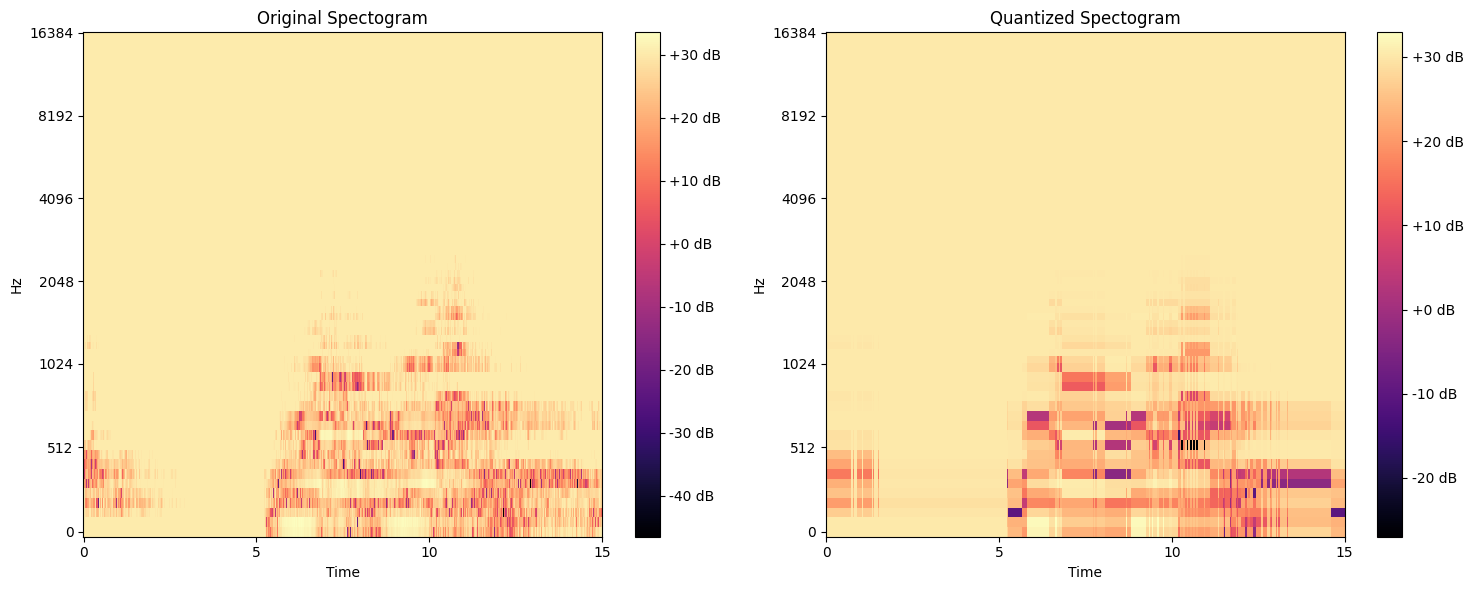

In [ ]:
# now lets plot out the original data and quantized in a two differenct spectogram graph
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

img1 = librosa.display.specshow(original_spectogram_data, sr=sr_librosa, x_axis="time", y_axis="mel", ax=axes[0])
axes[0].set_title("Original Spectogram")
fig.colorbar(img1, ax=axes[0], format="%+2.0f dB")

img2 = librosa.display.specshow(quantized_spectogram_data, sr=sr_librosa, x_axis="time", y_axis="mel", ax=axes[1])
axes[1].set_title("Quantized Spectogram")
fig.colorbar(img2, ax=axes[1], format="%+2.0f dB")

# axes[0].label_outer()
# axes[1].label_outer()

plt.tight_layout()
plt.show()

# Convert spectogram data back to waveform and save it

In [ ]:
# convert scale back
original_spectogram_inv = librosa.feature.inverse.mel_to_stft(original_spectogram_data, sr=sr_librosa, n_fft=1024)
quantized_spectogram_inv = librosa.feature.inverse.mel_to_stft(quantized_spectogram_data, sr=sr_librosa, n_fft=1024)

original_spectogram_inv.shape, quantized_spectogram_inv.shape

((513, 938), (513, 938))

In [ ]:
# griffin-lim algorithm to convert time into audio domain
original_griffinlim = librosa.griffinlim(original_spectogram_inv)
quantized_griffinlim = librosa.griffinlim(quantized_spectogram_inv)

original_griffinlim.shape, quantized_griffinlim.shape

((239872,), (239872,))

In [ ]:
# save it in wav form
sf.write("original_audio.wav", original_griffinlim, sr_librosa)
sf.write("quantized_audio.wav", quantized_griffinlim, sr_librosa)